# Ausgangsdaten:


In [ ]:
from IPython.display import Image
Image("/Data/sample.png")


<img src="/Data/sample.png">

# First Try
Start simple with Pytesseract / Tesseract and PIL


In [ ]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
import os
import os.path, time

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

mypath2data = '/Data/testing'
pulsearray = []
datearray = []

for file in os.listdir(mypath2data):
    if file.endswith(".PNG"):
        curImg = os.path.join(mypath2data, file)
        print(curImg)
        
        #print(pytesseract.image_to_string(Image.open(curImg)))
        result = pytesseract.image_to_string(Image.open(curImg))
        imgtime = time.ctime(os.path.getmtime(curImg))
        imgtimestamp = "%s %s %s" %(imgtime.split()[1],imgtime.split()[2], imgtime.split()[4])
        #print(imgtimestamp)
        datearray.append(imgtimestamp)
        nopulse = True                                      
        for splt in range(len(result.split())):
            if result.split()[splt] == "BPM":
                pulse = result.split()[splt-1]
                #print (pulse)
                pulsearray.append(pulse)
                nopulse = False
                break
        if nopulse:
            pulsearray.append("")

print(pulsearray)
print(datearray)
plt.plot(datearray, pulsearray, )

plt.xlabel('Date')
plt.ylabel('Pulse')
plt.title('My Personal Health')
plt.grid()

plt.savefig(mypath2data + "/test.png")
plt.show()

# Second Try
Apply some setting at Tesseract-Level

In [ ]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
import os

mypath2data = '/Data/testing'
datearray = []
pulsearray = []

for file in os.listdir(mypath2data):
    if file.endswith(".PNG"):
        curImg = os.path.join(mypath2data, file)
        print(curImg)
        
        result = (pytesseract.image_to_string(Image.open(curImg),config='--psm 11'))

        imgtime = time.ctime(os.path.getmtime(curImg))
        imgtimestamp = "%s %s %s" %(imgtime.split()[1],imgtime.split()[2], imgtime.split()[4])
        #print(imgtimestamp)
        datearray.append(imgtimestamp)
        nopulse = True                  

        for splt in range(len(result.split())):
            if result.split()[splt] == "BPM":
                pulse = result.split()[splt-1]
                #print (pulse)
                pulsearray.append(pulse)
                nopulse = False
                break
        if nopulse:
            pulsearray.append("")

print(pulsearray)
print(datearray)
plt.plot(datearray, pulsearray, )

plt.xlabel('Date')
plt.ylabel('Pulse')
plt.title('My Personal Health')
plt.grid()

plt.savefig(mypath2data + "/test.png")
plt.show()

# Third Try
Binarize the image

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Binarize (make it black and white) an image with Python."""

from PIL import Image, ImageFilter
from scipy.misc import imsave
import numpy


def binarize_image(img_path, target_path, threshold):
    """Binarize an image."""
    image_file = Image.open(img_path)
    image = image_file.convert('L')  # convert image to monochrome
    image = numpy.array(image)
    image = binarize_array(image, threshold)
    imsave(target_path, image)
    return image



def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array


def get_parser():
    """Get parser object for script xy.py."""
    from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
    parser = ArgumentParser(description=__doc__,
                            formatter_class=ArgumentDefaultsHelpFormatter)
    parser.add_argument("-i", "--input",
                        dest="input",
                        help="read this file",
                        metavar="FILE",
                        required=True)
    parser.add_argument("-o", "--output",
                        dest="output",
                        help="write binarized file hre",
                        metavar="FILE",
                        required=True)
    parser.add_argument("--threshold",
                        dest="threshold",
                        default=200,
                        type=int,
                        help="Threshold when to show white")
    return parser

#***********************************************************************
#***********************************************************************
def getfiles(dirpath):
    a = [s for s in os.listdir(dirpath)
         if os.path.isfile(os.path.join(dirpath, s))]
    a.sort(key=lambda s: os.path.getmtime(os.path.join(dirpath, s)))
    return a

#***********************************************************************
#***********************************************************************

import pytesseract
import os, sys

mypath2data = '/Data/testing'
imgbw = os.path.join(mypath2data,'bw.png')
imgshaprened = os.path.join(mypath2data,'sharpended.png')
imgemboss = os.path.join(mypath2data,'emboss.png')
imgcontour = os.path.join(mypath2data,'contour.png')

#print(pytesseract.image_to_string(Image.open('/Data/Testing/AW_ - 1.PNG'),config='--psm 11'))
#print(pytesseract.image_to_string(Image.open(img),config='--psm 11'))

datearray = []
pulsearray = []

#getfiles(mypath2data)
#for file in os.listdir(mypath2data):
for file in getfiles(mypath2data):
    if file.endswith(".PNG"):
        curImg = os.path.join(mypath2data, file)

        image_file = Image.open(curImg) # open colour image
        image_file.save(imgemboss)
        image_file.save(imgshaprened)
        image_file.save(imgcontour)
        image_file.save(imgbw)
        image_file.close()
        image_filebw = Image.open(imgbw) # open colour image
        image_filebw = image_filebw.convert('1') # convert image to black and white
        image_files = Image.open(imgshaprened) # open colour image
        image_files = image_files.convert('1') # convert image to black and white
        image_filee = Image.open(imgemboss) # open colour image
        image_filee = image_filee.convert('1') # convert image to black and white
        image_filec = Image.open(imgcontour) # open colour image
        image_filec = image_filec.convert('1') # convert image to black and white

        
        binparam = 10
        binimg = binarize_image(imgbw, imgbw, binparam)
        result = (pytesseract.image_to_string(binimg,config='--psm 11'))
        binimg = binarize_image(imgshaprened, imgshaprened, binparam)
        result = (pytesseract.image_to_string(binimg,config='--psm 11'))
        binimg = binarize_image(imgemboss, imgemboss, binparam)
        result = (pytesseract.image_to_string(binimg,config='--psm 11'))
        binimg = binarize_image(imgcontour, imgcontour, binparam)
        result = (pytesseract.image_to_string(binimg,config='--psm 11'))
        #print(result)
        #print("*"*50)

        imgtime = time.ctime(os.path.getmtime(curImg))
        imgtimestamp = "%s %s %s" %(imgtime.split()[1],imgtime.split()[2], imgtime.split()[4])
        #print(imgtimestamp)
        datearray.append(imgtimestamp)
        nopulse = True                  
        
        print(result.split())
        for splt in range(len(result.split())):
            if "BPM" in result.split()[splt]:
                pulse = result.split()[splt-1]
                print (pulse)
                pulsearray.append(pulse)
                nopulse = False
                break
        if nopulse:
            pulsearray.append("")

print(pulsearray)
print(datearray)
plt.plot(datearray, pulsearray, )

plt.xlabel('Date')
plt.ylabel('Pulse')
plt.title('My Personal Health')
plt.grid()

plt.savefig(mypath2data + "/test.png")
plt.show()

In [ ]:
import os, datetime

mypath2data = '/Data/test201906/rename'

cnt=0
for file in getfiles(mypath2data):
    if file.endswith(".PNG") or file.endswith(".png"):
        cnt += 1
        curImg = os.path.join(mypath2data, file)
        tmpstmp = os.path.getmtime(curImg)
        imgtime = time.ctime(tmpstmp)
        print(imgtime)
        print(os.path.getmtime(curImg))
        tmpstm = datetime.datetime.fromtimestamp(tmpstmp)
        imgtime = tmpstm.strftime("%Y-%m-%d_%H-%M-%S")
        print(imgtime)
        newImg = imgtime + str(cnt) + ".png"
        newImg = newImg.replace(" ","")
        newImg = os.path.join(mypath2data, newImg)
        print("mv '%s' %s" %(curImg, newImg))
        os.system("mv '%s' %s" %(curImg, newImg))

print()
print("finished")
        

# Fourth Try
Crop the image

In [ ]:

import imageio


2019-02-12_20-42-431.png

2019-02-12_20-42-432.png

2019-02-15_22-39-033.png

2019-02-15_22-39-208.png

2019-02-16_09-15-309.png

2019-02-16_09-15-3210.png

2019-02-23_11-43-3913.png

2019-02-23_11-56-0816.png

2019-02-27_17-31-5319.png

2019-02-27_17-32-0120.png

2019-03-02_19-45-4221.png

2019-03-02_19-45-4723.png

2019-03-04_21-39-4426.png

2019-03-04_21-39-4427.png

2019-03-05_05-55-4729.png

2019-03-05_05-55-4830.png

2019-03-06_07-17-0031.png

2019-03-12_08-01-5332.png

2019-03-12_08-02-4636.png

2019-03-12_21-35-1242.png

2019-03-12_21-35-1241.png

2019-03-14_10-44-3244.png

2019-03-14_10-44-3243.png

2019-03-16_09-17-3146.png

2019-03-16_09-17-3145.png

2019-03-17_10-40-1247.png

2019-03-17_10-40-1348.png

2019-03-18_06-29-5249.png

2019-03-19_06-31-5650.png

2019-03-19_06-31-5651.png

2019-03-20_19-27-4752.png

2019-03-20_19-27-5953.png

2019-03-21_05-27-1154.png

2019-03-23_17-58-0457.png

2019-03-23_17-58-0658.png

2019-03-25_07-11-5161.png

2019-03-25_07-11-5862.png

2019-

/Users/hansjoerg.stark/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


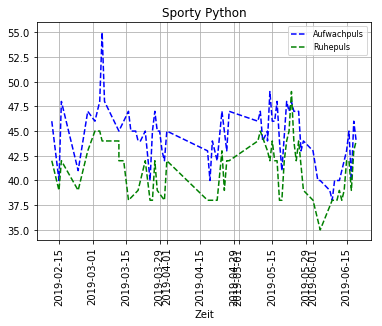

In [37]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Binarize (make it black and white) an image with Python."""

from PIL import Image, ImageFilter
from scipy.misc import imsave
import imageio
import numpy, time


def binarize_image(img_path, target_path, threshold):
    """Binarize an image."""
    image_file = Image.open(img_path)
    image = image_file.convert('L')  # convert image to monochrome
    image = numpy.array(image)
    image = binarize_array(image, threshold)
    #imsave(target_path, image)
    imageio.imwrite(target_path, image)
    return image



def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array


def get_parser():
    """Get parser object for script xy.py."""
    from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
    parser = ArgumentParser(description=__doc__,
                            formatter_class=ArgumentDefaultsHelpFormatter)
    parser.add_argument("-i", "--input",
                        dest="input",
                        help="read this file",
                        metavar="FILE",
                        required=True)
    parser.add_argument("-o", "--output",
                        dest="output",
                        help="write binarized file hre",
                        metavar="FILE",
                        required=True)
    parser.add_argument("--threshold",
                        dest="threshold",
                        default=200,
                        type=int,
                        help="Threshold when to show white")
    return parser

#***********************************************************************
#***********************************************************************
def getfiles(dirpath):
    a = [s for s in os.listdir(dirpath)
         if os.path.isfile(os.path.join(dirpath, s))]
    a.sort(key=lambda s: os.path.getmtime(os.path.join(dirpath, s)))
    return a

#***********************************************************************
#***********************************************************************

def cropimage(horizontal,vertical,horOffset,verOffset,imgsrcname,imgtarname):
        binparam = 10
        imgsrc = Image.open(imgsrcname)
        binimg = binarize_image(imgsrcname, imgtarname, binparam)
        width, height = imgsrc.size
        image_filebwr = Image.open(imgtarname) # open binarized image        
        cropped     = image_filebwr.crop((horizontal,vertical,width-horOffset,height-verOffset))  #crop image
        #cropped.show()
        cropped.save(imgtarname)
        return(imgtarname,cropped)



import pytesseract
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
import os, sys

notprocessed = []

#try:
#mypath2data = '/Users/hansjoerg.stark/Dropbox/Privat/2019GeoPython/Data/testing'
mypath2data = '/Users/hansjoerg.stark/Dropbox/Privat/2019GeoPython/Data/test201906/rename'
imgbw = os.path.join(mypath2data,'bw1.png')
imgbwr = os.path.join(mypath2data,'pulse.png')
imgtype = os.path.join(mypath2data,'pulsetype.png')

datearray = []
datearrayavg = []
pulsearray = []
pulsearrayavg = []

#getfiles(mypath2data)
for file in getfiles(mypath2data):
    #print(file)
    if file.endswith(".PNG") or file.endswith(".png") and (file[:4]=="2019" or file[:3]=="IMG"):
        curImg = os.path.join(mypath2data, file)
        print()
        print(file)
        image_file = Image.open(curImg) # open colour image
        image_file.save(imgbw)
        image_file.close()
        image_filebw = Image.open(imgbw) # open colour image
        image_filebw = image_filebw.convert('1') # convert image to black and white

        imgtime = time.ctime(os.path.getmtime(curImg))
        #print(imgtime)
        #imgtimestamp = "%s-%s-%s" %(imgtime.split()[1],imgtime.split()[2], imgtime.split()[4])
        imgtimestamp = "%s-%s-%s" %(imgtime.split()[4],imgtime.split()[1], imgtime.split()[2])
        #print(imgtimestamp)
        #datearray.append(imgtimestamp)


        #crop image to get type of pulse
        #        cropimage(vertical,verOffset,horOffset,horizontal,imgsrcname,imgtarname)
        vertical = 0
        horizontal = 12
        horOffset = 150
        verOffset = 300
        imgbwr,cropped = cropimage(horizontal,vertical,horOffset,verOffset,imgbw,imgtype)
        result = (pytesseract.image_to_string(imgtype,lang="SF_tesseract", config="--psm 11 "))    
        try:
            type = result.split()[-1].lower()
        except:
            pass
        #print("Typ: %s" %type)
        ptyp = 0
        if type[:4] == "aktu":
            ptyp = 0
        else:
            ptyp = 1


        #crop image to get pulse
        vertical = 170 #215
        horizontal = 0
        horOffset = 170 #170
        verOffset = 40 #40
        imgbwr,cropped = cropimage(horizontal,vertical,horOffset,verOffset,imgbw,imgbwr)
        result = (pytesseract.image_to_string(imgbwr,lang="SF_tesseract", config="--psm 11 "))    
        #print(result)
        try:
            pulse = result.split()[-1]
        except:
            notprocessed.append(curImg)
            pass

        try:
            ''.join([n for n in pulse if n.isdigit()])
            #print(pulse)
            if int(pulse)>150:
                pulse=pulse[:-1]
            pulseint=int(pulse)
            #print(pulse)
            if ptyp == 0:
                pulsearray.append(pulseint)
                datearray.append(imgtimestamp)
                #datearray.append(imgtime)
            else:
                pulsearrayavg.append(pulseint)
                datearrayavg.append(imgtimestamp)
                #datearrayavg.append(imgtime)
        except:
            #cropped.show()
            notprocessed.append(curImg)
            #print(pulse)

print("*"*50)
pa = np.array(pulsearray)
da = np.array(datearray)
paavg = np.array(pulsearrayavg)
daavg = np.array(datearrayavg)


#datearrayavg.sort()
print(pulsearray)
print(datearray)
print(pulsearrayavg)
print(datearrayavg)

print(pa)
print(da)
print(paavg)
print(daavg)

print(len(pulsearray))
print(len(datearray))
print(len(pulsearrayavg))
print(len(datearrayavg))

print()
print()
print(notprocessed)

'''
#imgtimestampfmt = matplotlib.dates.date2num(imgtimestamp)
#plt.plot(datearray, pulsearray,'+', 'r', label='Aufwachpuls' )
#plt.plot(datearrayavg, pulsearrayavg,'o', 'g', label='Durchschnittspuls' )
#plt.plot(datearray, pulsearray, 'r', label='Aufwachpuls' )
#plt.plot(datearrayavg, pulsearrayavg, 'g', label='Durchschnittspuls' )
#plt.plot(datearray, pulsearray, 'g',datearrayavg, pulsearrayavg,'y' )
plt.plot(da, pa, 'g',daavg, paavg,'y' )

plt.xlabel('Date')
plt.ylabel('Pulse')
plt.title('My Personal Health')
#plt.tight_layout()
#plt.grid()
plt.legend()
plt.xticks(rotation='vertical')
'''
import datetime
from matplotlib.dates import(drange)

'''
datetime_object1 = datetime.datetime.strptime(datearray[0], '%Y-%b-%d')
datetime_object2 = datetime.datetime.strptime(datearrayavg[0], '%Y-%b-%d')
datetime_object3 = datetime.datetime.strptime(datearray[len(datearray)-1], '%Y-%b-%d')
datetime_object4 = datetime.datetime.strptime(datearrayavg[len(datearrayavg)-1], '%Y-%b-%d')
'''

dates1=[]
dates2=[]

for el in datearray:
    dates1.append(datetime.datetime.strptime(el, '%Y-%b-%d'))
for el in datearrayavg:
    dates2.append(datetime.datetime.strptime(el, '%Y-%b-%d'))


plt.subplot(111)
fig.set_size_inches(18.5, 10.5)

# equivalent but more general
ax1=plt.subplot(1, 1, 1)
#plt.rcParams["figure.figsize"] = (40,30)
#fig.set_size_inches(18.5, 10.5, forward=True)

ax1.plot_date(dates1,pa,'--',color='blue', label='Aufwachpuls')
ax1.plot_date(dates2,paavg,'--',color='green', label='Ruhepuls')
ax1.legend(loc='upper left')

ax1.set(xlabel='Zeit')
#ax1.xaxis.set_label_coords(x=0.7, y = 0.05)
plt.xticks(rotation='vertical')
ax1.grid(True)
ax1.set(title="Sporty Python")
#rotation
#for tick in ax1.get_xticklabels():
#    tick.set_rotation(45)
#plt.tight_layout()    
plt.legend()

#plt.savefig(outputflnname)    

#plt.savefig(mypath2data + "/_graphresult.png", bbox_inches = "tight")
#fig.savefig('test2png.png', dpi=100)
plt.savefig(mypath2data + "/_graphresult.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt


In [ ]:
print(matplotlib.__version__)